Proporción de canciones añadidas: 0.68
Proporción de canciones añadidas: 0.86
Ranking promedio de la primera canción guardada: 1.98


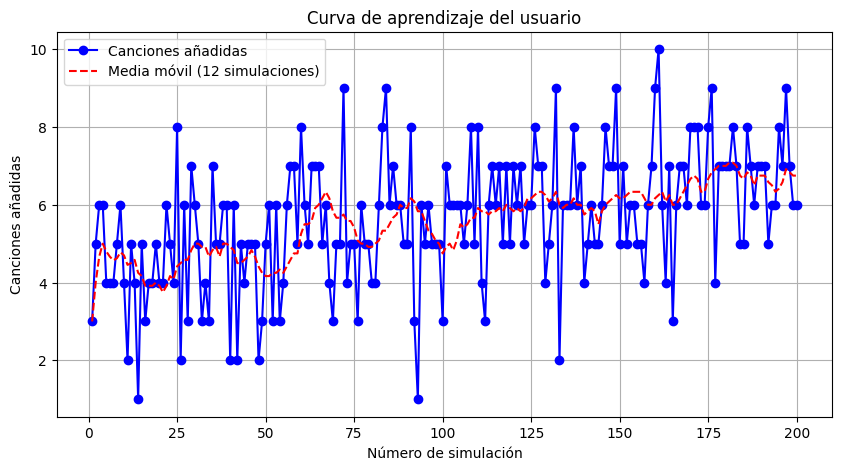

Proporción de canciones añadidas: 0.72
3632 canciones fueron recomendadas 0 veces
3721 canciones fueron recomendadas 1 veces
1902 canciones fueron recomendadas 2 veces
565 canciones fueron recomendadas 3 veces
131 canciones fueron recomendadas 4 veces
38 canciones fueron recomendadas 5 veces
11 canciones fueron recomendadas 6 veces


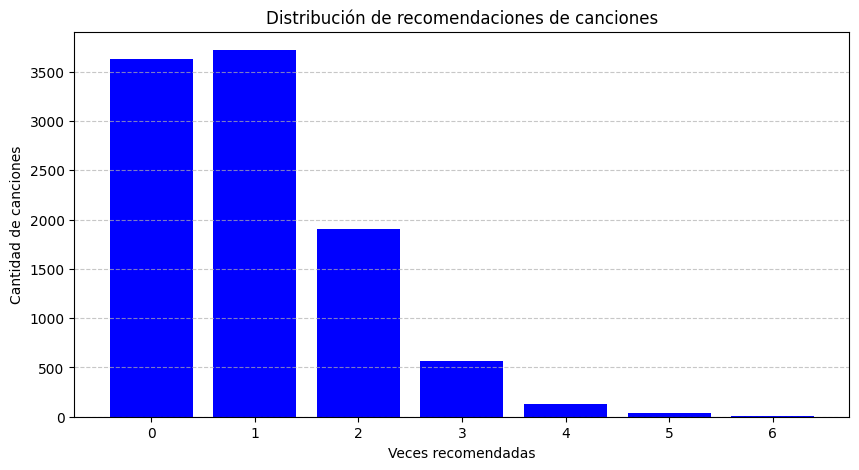

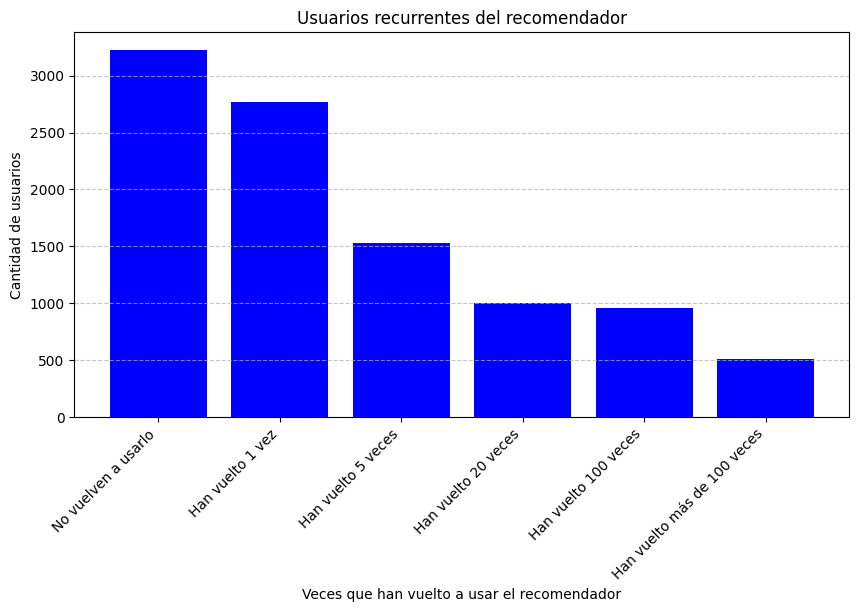

Usuarios que han añadido canciones: 9206
Usuarios que no han añadido canciones: 794
Proporción de usuarios que añaden canciones: 92.06%


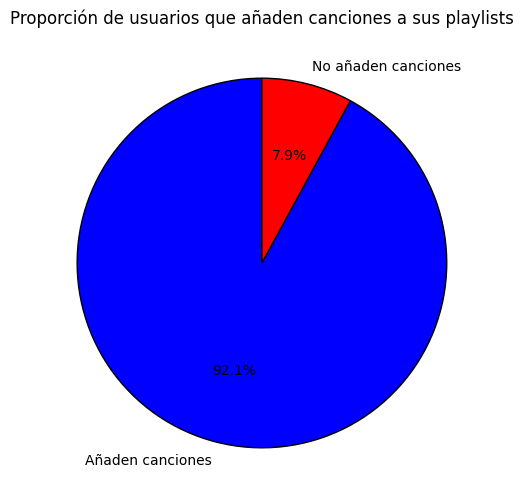

In [3]:

#Esta es una recopilación de las principales métricas que vamos a incorporar para analizar el nivel de performance del proyecto
#Hay otros procedimientos que hemos desestimado por ser demasiado intrusivos con el usuario, tales como generar dos playlists, una
#con canciones aleatorias o con muy pocos filtros y la otra con nuestros sistemas de remendación. La idea de este método es comparar
#cuántas veces nuestros algoritmos son mejores que la aleatoriedad (esperamos que al menos un 93-97 por ciento de los casos así sea).
#Sin embargo esto requiere de empeorar notablemente la experiencia del usuario, por lo que queda descartado.
#Aquí están los que pasaron la criba:

#__________________________________________________________________________________________________________________________________________________________

#Proporción de canciones que el usuario añade a una playlist frente a la cantidad de recomendadas
def calcular_proporcion(canciones_guardadas, total_canciones_recomendadas):
    #Meto el caso en el que el total de recomendaciones es 0 para que no se diga
    if total_canciones_recomendadas == 0:
        return "No hay recomendaciones" #En realidad puede estar bien para detectar errores
    
    return canciones_guardadas / total_canciones_recomendadas

canciones_guardadas = 34
total_canciones_recomendadas = 50
proporcion = calcular_proporcion(canciones_guardadas, total_canciones_recomendadas)
print(f"Proporción de canciones añadidas: {proporcion:.2f}")

#__________________________________________________________________________________________________________________________________________________________

#Cantidad promedio de canciones que el usuario tiene que escuchar antes de añadir una a una playlist
import random #Esto es solo para simular datos, en la web tomaremos los reales

def calcular_proporcion(canciones_guardadas, total_canciones_recomendadas):
 
    if total_canciones_recomendadas == 0:
        return "No hay recomendaciones"
    
    return canciones_guardadas / total_canciones_recomendadas

def promedio_posicion_primera_guardada(num_simulaciones=100, total_canciones_recomendadas=10):
    #Este es el que saca el ranking promedio de la primera canción guardada. Se inventa un ranking para cada simulación y hace 100.
    posiciones = []
    
    for _ in range(num_simulaciones):
        seleccionadas = sorted(random.sample(range(1, total_canciones_recomendadas + 1), random.randint(1, total_canciones_recomendadas)))
        posiciones.append(seleccionadas[0])
    
    return sum(posiciones) / len(posiciones)

canciones_guardadas = 43
total_canciones_recomendadas = 50
proporcion = calcular_proporcion(canciones_guardadas, total_canciones_recomendadas)
print(f"Proporción de canciones añadidas: {proporcion:.2f}")

promedio = promedio_posicion_primera_guardada()
print(f"Ranking promedio de la primera canción guardada: {promedio:.2f}")

#__________________________________________________________________________________________________________________________________________________________

#Curva de aprendizaje del usuario: ver si obtiene mejores recomendaciones (es decir, si se queda con más) simplemente por saber usar mejor el recomendador (?)

import random
import matplotlib.pyplot as plt
import numpy as np

def simulacion_curva_aprendizaje(num_simulaciones=100, total_recomendadas=10, incremento_probabilidad=0.0015):
    #Estamos simulando que el usuario va a guardar más canciones a medida que se acostumbra a usar el recomendador
    #Le he metido una tasa de aprendizaje del 0,15%. No es mucho, pero se compensa con la cantidad de simulaciones (200)
    #Con lo cual empezamos la simulación con una puntuación esperada del 40% y la aumentamos en 0,15% en cada simulación hasta llegar al 70%
    #después de todas las simulaciones

    canciones_guardadas_por_simulacion = []
    probabilidad_actual = 0.4  #Estimamos que al inicio le gustarán un 40% de las canciones, por ejemplo
    
    for _ in range(num_simulaciones):
        canciones_guardadas = sum(1 for _ in range(total_recomendadas) if random.random() < probabilidad_actual)
        canciones_guardadas_por_simulacion.append(canciones_guardadas)
        probabilidad_actual += incremento_probabilidad  #En cada simulación el usuario maneja un pelín mejor el recomendador (o expresa mejor sus gustos, etc)
    
    return canciones_guardadas_por_simulacion

def calcular_media_movil(datos, ventana=12):
    """
    Calcula la media móvil de los últimos 'ventana' valores.
    """
    return [np.mean(datos[max(0, i-ventana+1):i+1]) for i in range(len(datos))]

num_simulaciones = 200
total_recomendadas = 10
resultados = simulacion_curva_aprendizaje(num_simulaciones, total_recomendadas)
media_movil = calcular_media_movil(resultados, ventana=12)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_simulaciones + 1), resultados, marker='o', linestyle='-', color='b', label="Canciones añadidas")
plt.plot(range(1, num_simulaciones + 1), media_movil, linestyle='--', color='r', label="Media móvil (12 simulaciones)")
plt.xlabel("Número de simulación")
plt.ylabel("Canciones añadidas")
plt.title("Curva de aprendizaje del usuario")
plt.legend()
plt.grid(True)
plt.show()

#__________________________________________________________________________________________________________________________________________________________

#Tasa de descubrimiento de canciones nuevas
      #Este es básicamente el mismo algoritmo (al final es calcular una proporción) pero con otro nombre
      #La idea es que, una vez que el usuario se haya guardado una recomendación, le preguntemos si ya conocía la canción
      #Con esa pregunta de sí o no estamos averiguando cuántas de las canciones que le recomendamos no las conocía antes

def calcular_proporcion(canciones_nuevas, total_canciones_guardadas):
    if total_canciones_recomendadas == 0:
        return "No hay recomendaciones"
    
    return canciones_nuevas / total_canciones_guardadas

canciones_nuevas = 36
total_canciones_guardadas = 50
proporcion = calcular_proporcion(canciones_nuevas, total_canciones_guardadas)
print(f"Proporción de canciones añadidas: {proporcion:.2f}")

#__________________________________________________________________________________________________________________________________________________________

#Cuando haya suficientes datos, evaluar qué canciones tienden a ser más recomendadas por el algorito. 
#Esto al final es un análisis tanto de los usuarios como de las canciones
import random
from collections import Counter
import matplotlib.pyplot as plt

def evaluar_frecuencia_recomendaciones(num_canciones=10000, num_selecciones=10000):
    #Estoy simulando un ds de 10k canciones y 10k recomendaciones de entre esas canciones
    #La idea es analizar qué canciones se recomiendan más y cuáles menos, sobre todo de cara a las canciones que no se recomiendan nunca
    canciones_recomendadas = [random.randint(1, num_canciones) for _ in range(num_selecciones)]
    frecuencia = Counter(canciones_recomendadas)
    
    conteo_ocurrencias = Counter(frecuencia.values())
    
    #Aquí sumo las canciones que no se han recomendado nunca
    canciones_no_recomendadas = num_canciones - sum(conteo_ocurrencias.values())
    conteo_ocurrencias[0] = canciones_no_recomendadas
    
    #Los saco en orden
    for veces, cantidad in sorted(conteo_ocurrencias.items()):
        print(f"{cantidad} canciones fueron recomendadas {veces} veces")
    
    plt.figure(figsize=(10, 5))
    plt.bar(conteo_ocurrencias.keys(), conteo_ocurrencias.values(), color='b')
    plt.xlabel("Veces recomendadas")
    plt.ylabel("Cantidad de canciones")
    plt.title("Distribución de recomendaciones de canciones")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

evaluar_frecuencia_recomendaciones()

#__________________________________________________________________________________________________________________________________________________________

#Qué cantidad de usuarios vuelven a usar el recomendador (este evalúa más al recomendador que sus recomendaciones)

import random
import matplotlib.pyplot as plt
from collections import Counter

def generar_datos_uso(num_usuarios=10000):
    #Aquí estoy simulando la cantidad de veces que los usuarios vuelven a usar el recomendador
    #Como siempre, esto son datos figurados para mostrar cómo lidiaríamos con ellos una vez esté la web en marcha
    datos_uso = [random.choices([0, 1, 5, 20, 100, 101], weights=[0.32, 0.28, 0.15, 0.1, 0.1, 0.05])[0] for _ in range(num_usuarios)]
    conteo_uso = Counter(datos_uso)
    
    categorias = {
        "No vuelven a usarlo": conteo_uso[0],
        "Han vuelto 1 vez": conteo_uso[1],
        "Han vuelto 5 veces": conteo_uso[5],
        "Han vuelto 20 veces": conteo_uso[20],
        "Han vuelto 100 veces": conteo_uso[100],
        "Han vuelto más de 100 veces": conteo_uso[101],
    }
    
    return categorias

def graficar_usuarios_recurrentes(conteo_usuarios):
    plt.figure(figsize=(10, 5))
    plt.bar(conteo_usuarios.keys(), conteo_usuarios.values(), color='b')
    plt.xlabel("Veces que han vuelto a usar el recomendador")
    plt.ylabel("Cantidad de usuarios")
    plt.title("Usuarios recurrentes del recomendador")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

conteo_usuarios = generar_datos_uso()
graficar_usuarios_recurrentes(conteo_usuarios)

#__________________________________________________________________________________________________________________________________________________________

#Qué cantidad de usuarios añaden canciones a sus playlists

import random
import matplotlib.pyplot as plt

def calcular_proporcion_usuarios(total_usuarios=10000):
#Otro de proporciones. En este caso los datos están pensados para simular cuántos usuarios añaden canciones a sus playlists
    usuarios_que_añaden = sum(random.choices([1, 0], weights=[0.92, 0.08], k=total_usuarios))
    usuarios_no_añaden = total_usuarios - usuarios_que_añaden
    proporcion = usuarios_que_añaden / total_usuarios
    
    print(f"Usuarios que han añadido canciones: {usuarios_que_añaden}")
    print(f"Usuarios que no han añadido canciones: {usuarios_no_añaden}")
    print(f"Proporción de usuarios que añaden canciones: {proporcion:.2%}")
    
    labels = ["Añaden canciones", "No añaden canciones"]
    sizes = [usuarios_que_añaden, usuarios_no_añaden]
    colors = ['blue', 'red']
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
    plt.title("Proporción de usuarios que añaden canciones a sus playlists")
    plt.show()

calcular_proporcion_usuarios()

